As always first we need to import the modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First at all create an square array that contains two values 1 if the spin points up and -1 otherwise. The array must be filled randomly such that it it's initialize in a random state and it must be an numpy array. 

In [2]:
def prepare_system(L):
    """
    Initialize the system 
    
    Paramaters
    ----------
    L : system size
    
    Returns
    -------
    system: A square numpy array randomly initialize 
    """
    return system

Make a function that return the energy associated with one spin, use the ising model, measure the energy just taking care of the first neighbors : https://es.wikipedia.org/wiki/Modelo_de_Ising

In [3]:
def energy(system, i, j, L):
    """Measure the energy of a single spin in the array,. Take care of the borders 
    
    Paramaters
    ----------
    system : the actual numpy array, that contains the state of the system
    i : position in x of the spin in the matrix
    j : position in y of the spin in the matrix
    L : system size
    
    Returns
    -------
    E: energy of the spin
    """
    return E

Make a function that checks all the spins and add the energy of every spin, such that you can measure the energy of the whole system.

In [4]:
def measure_energy(system):
    """run a monte carlo simulation for given system size.
    
    Paramaters
    ----------
    system : the actual numpy array, that contains the state of the system
    
    Returns
    -------
    E_T: Total energy of the system
    """
    L = system.shape[0]
    return E_T

Make the metropolis loop that minimize the energy, don't forget to take into account the probability associated with thermal fluctuation $p(E_i)= e^{-\frac{E_i}{K_BT}}$, and store the measured energy in an array. 

In [5]:
def metropolis_loop(system, T, N_sweeps, N_eq, N_flips):
    """run a monte carlo simulation for given system size.
    
    Paramaters
    ----------
    system : the actual numpy array, that contains the state of the system
    T: temperature of the system
    N_sweeps : number of steps for the measurements
    N_eq : number of equilibration steps. Defaults to N_sweeps/10.
    N_flips : number of updates between measurements.
    
    Returns
    -------
    E_list : energies at a given temperature
    """
    E = measure_energy(system)
    L = system.shape[0]
    E_list = []
    for step in range(N_sweeps + N_eq):
        if dE <= 'fill here':
            #fill here'
        elif np.exp(-1. / T * dE) > 'fill here':
            #fill here

        if step >= N_eq and np.mod(step, N_flips) == 0:
            # measurement
            E_list.append(E)
    return np.array(E_list)

When you have finish run the next two section to check that your code is working properly, and recovers the graphs. 

1.5 -31.112 [0.18692622222222327, 0.018100955844074756]
1.6 -30.976 [0.2693960937500003, 0.04238571466172586]
1.7000000000000002 -29.536 [0.3307806228373701, 0.03198572942534769]
1.8000000000000003 -30.16 [0.40119506172839525, 0.05991326365585543]
1.9000000000000004 -29.08 [0.4191994459833789, 0.04057487375956725]
2.0000000000000004 -27.384 [0.5713068999999997, 0.05618389844456333]
2.1000000000000005 -27.784 [0.6516270294784575, 0.02887883002296213]
2.2000000000000006 -26.104 [0.6916585123966936, 0.04142416708580635]
2.3000000000000007 -24.824 [0.8141911531190923, 0.028191014997176207]
2.400000000000001 -23.688 [0.7937839583333329, 0.011004600462585865]
2.500000000000001 -22.192 [0.7567285119999995, 0.020016523410234653]
2.600000000000001 -19.68 [0.8110626627218929, 0.014237427874086044]
2.700000000000001 -19.192 [0.7411567626886142, 0.01807283707562861]
2.800000000000001 -17.072 [0.6872705612244892, 0.015522530164623039]
2.9000000000000012 -17.448 [0.6593220927467294, 0.01342502948425

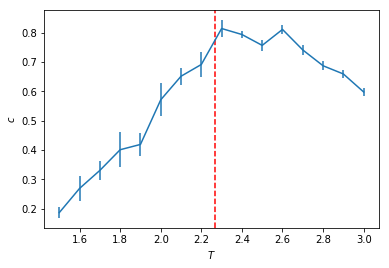

In [6]:
if __name__ == "__main__":
    """ Scan through some temperatures """
    # Set parameters here
    L = 4  # Linear system size
    N_sweeps = 5000  # Number of steps for the measurements
    N_eq = 1000  # Number of equilibration steps before the measurements start
    N_flips = 10  # Number of steps between measurements
    N_bins = 10  # Number of bins use for the error analysis

    T_range = np.arange(1.5, 3.1, 0.1)

    C_list = []
    system = prepare_system(L)
    for T in T_range:
        C_list_bin = []
        for k in range(N_bins):
            Es = metropolis_loop(system, T, N_sweeps, N_eq, N_flips)

            mean_E = np.mean(Es)
            mean_E2 = np.mean(Es**2)

            C_list_bin.append(1. / T**2. / L**2. * (mean_E2 - mean_E**2))
        C_list.append([np.mean(C_list_bin), np.std(C_list_bin) / np.sqrt(N_bins)])

        print(T, mean_E, C_list[-1])

    # Plot the results
    C_list = np.array(C_list)
    plt.errorbar(T_range, C_list[:, 0], C_list[:, 1])
    Tc = 2. / np.log(1. + np.sqrt(2))
    print(Tc)
    plt.axvline(Tc, color='r', linestyle='--')
    plt.xlabel('$T$')
    plt.ylabel('$c$')
    plt.show()

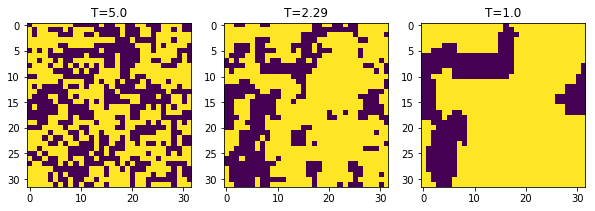

In [9]:
'''Make Plots of your system'''
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
system = prepare_system(32)
Ts =  [5., 2.29, 1.]
for i in range(3):
    T = Ts[i]
    metropolis_loop(system, T, 10000, 1000, 10)  # get typical configurations
    axes[i].imshow(system)   # plot it
    axes[i].set_title("T="+str(T))
plt.show()